In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/all_v2.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [ ]:
data.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


Checking for missing data

In [ ]:
  data.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [ ]:
data.columns

Index(['price', 'date', 'time', 'geo_lat', 'geo_lon', 'region',
       'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area',
       'object_type'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


Removing rows that have price < 0

In [ ]:
data[data['price']<=0]

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
43821,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520,1,13,22,1,38.92,17.26,11
43822,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520,1,14,22,1,38.92,17.26,11
179212,0,2018-10-01,08:59:36,53.327778,83.668570,6817,3,5,10,3,104.00,15.00,1
199895,-429242296,2018-10-04,09:21:35,55.038734,82.985600,9654,2,5,25,2,57.27,9.31,11
208483,-1744967296,2018-10-06,05:06:46,54.991330,82.882575,9654,3,4,5,2,45.00,6.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382188,-2041757296,2021-04-23,07:00:09,57.636265,39.973962,2604,3,2,4,1,41.08,9.31,11
5382595,-1794967296,2021-04-23,07:37:00,56.115619,38.416266,81,1,4,5,2,56.00,9.00,1
5398253,-1494967296,2021-04-26,05:04:58,45.111303,36.881901,2843,3,3,3,1,45.00,17.00,11
5419426,-2094967296,2021-04-27,09:05:31,58.223183,68.305352,3991,3,14,19,1,30.00,8.00,1


In [ ]:
# keeping only the rows that have price values > 0

data = data[data['price']>0]

In [ ]:
data.shape

(5476618, 13)

In [ ]:
data.head(15)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1
6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1
8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1


we will divide the price value by 100000 for easier handling

In [ ]:
data['price']=data['price']/100000
data = data.rename(columns={'price':'price (100K)'})

In [ ]:
data.head()

,price (100K),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,60.5,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,86.5,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,40.0,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,18.5,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,54.5,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


OUTLIER ANALYSIS

{'boxes': [<matplotlib.lines.Line2D at 0x7f5170d8ef50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5170da2ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5170da7f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5170da79d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5170da2450>,
  <matplotlib.lines.Line2D at 0x7f5170da2990>]}

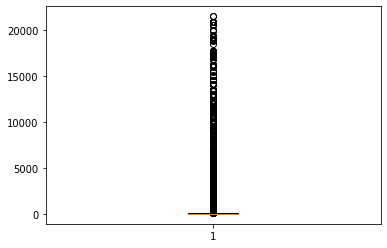

In [ ]:
import matplotlib
for_plot = data['price (100K)']
matplotlib.pyplot.boxplot(for_plot)

Minimum house price in Russia is around 400 thousand rubels. So we will remove anything lower than *that*

In [ ]:
data[data['price (100K)']<4]

,price (100K),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
1514,3.000,2018-09-08,04:59:20,52.561070,85.234409,6817,5,1,1,1,26.0,7.0,1
1916,2.500,2018-09-08,09:08:31,48.046666,40.125644,3230,1,1,5,1,21.0,6.0,1
2321,0.008,2018-09-08,10:47:47,56.843821,62.716112,6171,1,3,5,1,32.0,6.0,1
3093,3.500,2018-09-08,13:17:43,54.146194,86.613132,2860,3,5,5,1,30.1,8.0,1
3114,2.000,2018-09-08,13:26:44,62.891076,54.970197,4417,3,2,2,2,46.5,6.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473533,2.500,2021-05-01,14:10:45,67.519125,64.073445,4417,4,3,5,1,36.0,6.0,1
5474635,3.200,2021-05-01,16:18:49,55.784830,42.628058,2871,3,2,2,2,45.0,6.0,1
5476102,0.063,2021-05-01,18:35:48,55.926270,37.723278,81,2,15,17,1,33.0,9.4,1
5476156,0.110,2021-05-01,18:42:38,48.747428,44.509038,4695,2,18,18,1,38.0,11.0,1


In [ ]:
#keeping only the rows with price above 400K rubels

data = data[data['price (100K)']>4]

In [ ]:
data.shape

(5464616, 13)

In [ ]:
Q1 = data['price (100K)'].quantile(0.25)
Q3 = data['price (100K)'].quantile(0.75)
IQR1 = Q3-Q1

In [ ]:
data[data['price (100K)']<(Q1-(1.5*IQR1))]

,price (100K),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type


In [ ]:
outliers=data[data['price (100K)']>(Q3+(1.5*IQR1))]
outliers

,price (100K),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
29,115.0000,2018-04-03,17:40:53,55.798921,37.738090,3,1,14,16,3,64.9,8.0,1
34,102.0000,2018-04-07,15:23:20,55.655307,37.614605,3,2,7,14,2,52.8,10.0,1
44,115.0000,2018-04-18,21:52:41,55.701330,37.507412,3,1,14,17,1,42.0,12.0,1
56,209.0000,2018-05-01,13:33:09,55.730785,37.631424,3,3,6,10,3,80.0,8.2,1
59,120.0000,2018-05-12,21:08:19,55.627136,37.591736,3,1,4,9,3,64.9,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476999,128.5000,2021-05-01,20:13:47,55.701280,37.642654,3,2,12,24,1,41.0,9.0,1
5477001,197.3976,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,125.0316,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477004,118.3191,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


There are too many outliers on the higher side, so we will take an average and then remove those above the average

In [ ]:
mean_o = outliers['price (100K)'].mean()
mean_o

194.0645027626076

In [ ]:
data = data[data['price (100K)']<194.064]

In [ ]:
data.shape

(5380377, 13)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5170d78bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5170884a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f517088dad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f517088d590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f517087c190>,
  <matplotlib.lines.Line2D at 0x7f5170884550>]}

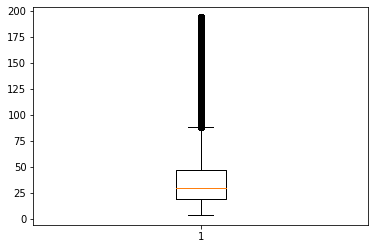

In [ ]:
for_plot = data['price (100K)']
matplotlib.pyplot.boxplot(for_plot)

Checking if given location is within Russian Territory

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

def city_state_country(row):
    coord = f"{row['geo_lat']}, {row['geo_lon']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    country = address.get('country', '')
    row['country'] = country
    return row

data = data.apply(city_state_country, axis=1)
print(data)

KeyboardInterrupt: ignored

Correlation

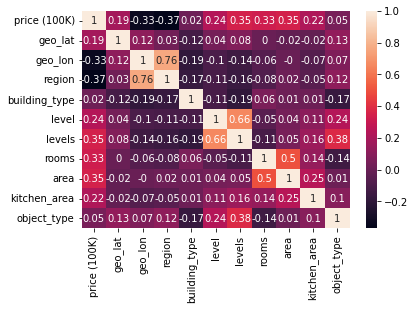

In [ ]:
#performing correlation

import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X=data
Y=data

In [ ]:
X=data.drop(['price (100K)', 'date','time','geo_lat','geo_lon'], axis=1)
Y=data["price (100K)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

,region,building_type,level,levels,rooms,area,kitchen_area,object_type
5083391,6171,0,5,10,1,34.2,8.50,1
3465265,5520,1,11,16,1,41.4,8.50,11
3644980,3446,2,8,16,1,39.0,11.00,1
752864,6171,2,3,8,1,22.0,3.00,1
649975,9654,1,9,10,3,87.7,12.92,11
...,...,...,...,...,...,...,...,...
1589216,6171,0,2,25,3,78.0,12.50,1
2262530,6817,3,4,5,2,43.0,6.00,1
5008064,6543,5,2,2,3,65.0,8.00,1
4369457,2072,1,3,17,2,57.5,8.50,11


In [ ]:
X_test

,region,building_type,level,levels,rooms,area,kitchen_area,object_type
946370,9654,1,10,10,3,87.39,13.0,11
907164,9654,1,2,10,2,58.00,8.5,11
4723835,3230,3,3,5,1,30.50,6.2,1
4369603,5282,1,6,10,2,51.10,8.0,1
4961989,3,1,5,17,3,80.60,14.0,1
...,...,...,...,...,...,...,...,...
1448799,81,3,14,17,2,64.00,17.0,1
5459381,2722,2,5,15,1,34.00,7.7,1
520333,9654,1,3,10,3,87.39,15.0,11
5130763,3870,3,7,14,-1,24.80,5.0,11


In [ ]:
y_train

5083391    33.00000
3465265    23.50000
3644980    40.00000
752864     22.50000
649975     19.80000
             ...   
1589216    68.00000
2262530    21.30000
5008064    18.90000
4369457    30.99256
1713628    89.50000
Name: price (100K), Length: 4304301, dtype: float64

In [ ]:
y_test

946370      22.50
907164      18.40
4723835     26.00
4369603     23.55
4961989    129.00
            ...  
1448799     73.00
5459381     36.30
520333      23.50
5130763     19.00
1595269     10.81
Name: price (100K), Length: 1076076, dtype: float64

In [ ]:
# Scale train and test sets with StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fix the dimensions of the target array
y_train = y_train.values.reshape(-1, 1).ravel()
y_test = y_test.values.reshape(-1, 1).ravel()

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
predictions=lin_model.predict(X_test)


data1 = [{'Training Accuracy': lin_model.score(X_train,y_train), 'Testing Accuracy': lin_model.score(X_test,y_test)}]
df1= pd.DataFrame(data1)
display(df1.style.hide_index())


data2 = [{'R2': r2_score(y_test, predictions),'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)), 'MAE': mean_absolute_error(y_test, predictions), 'Explained Variance Score': explained_variance_score(y_test, predictions)}]
df2= pd.DataFrame(data2)
display(df2.style.hide_index())



Training Accuracy,Testing Accuracy
0.383291,0.385478


R2,RMSE,MAE,Explained Variance Score
0.385478,23.054807,15.826380,0.385478


XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
param = {"booster":"gblinear", "objective":"reg:squarederror"}
xgb_model = xgb.XGBRegressor(params = param, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

predictions=xgb_model.predict(X_test)

data1 = [{'Training Accuracy': xgb_model.score(X_train,y_train), 'Testing Accuracy': xgb_model.score(X_test,y_test)}]
df1= pd.DataFrame(data1)
display(df1.style.hide_index())


data2 = [{'R2': r2_score(y_test, predictions),'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)), 'MAE': mean_absolute_error(y_test, predictions), 'Explained Variance Score': explained_variance_score(y_test, predictions)}]
df2= pd.DataFrame(data2)
display(df2.style.hide_index())


[11:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:24:15] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


Training Accuracy,Testing Accuracy
0.767004,0.766786


R2,RMSE,MAE,Explained Variance Score
0.766786,14.202678,9.216203,0.766786


In [ ]:
output = pd.DataFrame({'Sl.No.':X_test.ID,'Price':predictions})
output.to_csv('submission.csv',index = 0)

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 30, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600]}

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
rfrf=RandomForestRegressor()
rfrf.fit(X_train,y_train)
y_pred = rfrf.predict(X_test)

data1 = [{'Training Accuracy': xgb_model.score(X_train,y_train), 'Testing Accuracy': xgb_model.score(X_test,y_test)}]
df1= pd.DataFrame(data1)
display(df1.style.hide_index())


data2 = [{'R2': r2_score(y_test, predictions),'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 'MAE': mean_absolute_error(y_test, y_pred), 'Explained Variance Score': explained_variance_score(y_test, y_pred)}]
df2= pd.DataFrame(data2)
display(df2.style.hide_index())



In [ ]:
def based_on_area(data):
  from math import radians
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.model_selection import train_test_split

  data=data.iloc[:100000, :]
  data['geo_lat'] = data['geo_lat'].apply(radians)
  data['geo_lon'] = data['geo_lon'].apply(radians)

  X = data[['geo_lat', 'geo_lon']].values
  y = data['price'].values

  X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.25)

  nbrs = KNeighborsRegressor(weights='distance', metric='haversine')

  nbrs.fit(X_train, y_train)

  y_pred = nbrs.predict(X_test)
  accuracy = nbrs.score(X_train, y_train)
  return(y_pred, accuracy)

In [ ]:
predictions, accuracy= based_on_area(data)

print("The accuracy of the KNNRegressor is: ",accuracy)

The accuracy of the KNNRegressor is:  -0.20661239399967535


In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

lin_model.fit(X_train,y_train)
predictions=lin_model.predict(X_test)

data1 = [{'Training Accuracy': lin_model.score(X_train,y_train), 'Testing Accuracy': lin_model.score(X_test,y_test)}]
df1= pd.DataFrame(data1)
display(df1.style.hide_index())


data2 = [{'R2': r2_score(y_test, predictions),'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)), 'Explained Variance Score': explained_variance_score(y_test, predictions)}]
df2= pd.DataFrame(data2)
display(df2.style.hide_index())

Training Accuracy,Testing Accuracy
0.021619,0.022308


R2,RMSE,Explained Variance Score
0.022308,21158251.203298,0.022309


In [ ]:
#hyperparameter tuning for Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param_grid2 = {'bootstrap': [True, False],
              'max_depth': [10, 30, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600]}

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_grid2, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
rfrf = RandomForestRegressor(

In [ ]:
rfrf.fit(X_train,y_train)
y_pred6 = rfrf.predict(X_test)

d = [{'Cross Validation score (mean)': scores_rfrf.mean()}]
df=pd.DataFrame(d)
display(df.style.hide_index())


d1 = [{'Training Accuracy': rfrf.score(X_train,y_train), 'Testing Accuracy': rfrf.score(X_test,y_test)}]
df1= pd.DataFrame(d1)
display(df1.style.hide_index())


d2 = [{'R2': r2_score(y_test, y_pred6),'MSE': mean_squared_error(y_test, y_pred6), 'RMSE': math.sqrt(mean_squared_error(y_test, y_pred6))}]
df2= pd.DataFrame(d2)
display(df2.style.hide_index())

In [ ]:
#fitting a Repeated Feature Elimination (RFE) method of feature Selection, on the linear regression model

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

#scores_lin = cross_val_score(lin_model, X, y)
#print("Cross validation score of %0.2f with a standard deviation of %0.2f" % (scores_lin.mean(), scores_lin.std()))

rfe_lin = RFECV(lin_model)
pipeline = Pipeline(steps=[('s',rfe_lin),('m',lin_model)])

scores_lin = cross_val_score(pipeline, X, Y)

# fitting the training data
pipeline.fit(X_train,y_train)


#checking accuracy of the model
#print()
#print("Training accuracy score is: ",pipeline.score(X_train,y_train))
#print("Testing accuracy score is: ",pipeline.score(X_test,y_test))

prediction_lin=pipeline.predict(X_test)

#print()
#print('R squared value is : ',r2_score(y_test, prediction_lin))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lin)))
#print('Explained Variance Score:', explained_variance_score(y_test, prediction_lin))

print("Linear Regression Model: ")
print()

data = [{'Cross Validation score (mean)': scores_lin.mean()}]
df=pd.DataFrame(data)
display(df.style.hide_index())


data1 = [{'Training Accuracy': pipeline.score(X_train,y_train), 'Testing Accuracy': pipeline.score(X_test,y_test)}]
df1= pd.DataFrame(data1)
display(df1.style.hide_index())


data2 = [{'R2': r2_score(y_test, prediction_lin),'RMSE': np.sqrt(metrics.mean_squared_error(y_test, prediction_lin)), 'Explained Variance Score': explained_variance_score(y_test, prediction_lin)}]
df2= pd.DataFrame(data2)
display(df2.style.hide_index())


KeyboardInterrupt: ignored

In [ ]:
#Stochastic gradient model

# Hyperparameter tuning

from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
param_grid = {'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet']}

# Use the grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
sgd_random = RandomizedSearchCV(estimator = sgd_model, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
sgd_random.fit(X_train, y_train)
sgd_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
#fitting a Repeated Feature Elimination (RFE) method of feature Selection, on the best stochastic gradient model

# scaling the data prior to splitting, as SGD regressor works best only with normalized data (for checking cross_val_score)
X_ = scaler.fit_transform(X)
y_ = y.values.reshape(-1, 1).ravel()

sgd_model_f=SGDRegressor(penalty='l2', loss= 'squared_loss')

rfe_sgd = RFECV(estimator=sgd_model_f)
pipeline = Pipeline(steps=[('s',rfe_sgd),('m',sgd_model_f)])

scores_sgd = cross_val_score(pipeline, X, y)
#print("Cross validation score of %0.2f with a standard deviation of %0.2f" % (scores_sgd.mean(), scores_sgd.std()))

# fitting the training data
pipeline.fit(X_train,y_train)

prediction_sgd=pipeline.predict(X_test)

print("Stochastic gradient model: ")
print()

data = [{'Cross Validation score (mean)': scores_sgd.mean()}]
df=pd.DataFrame(data)
display(df.style.hide_index())


data1 = [{'Training Accuracy': pipeline.score(X_train,y_train), 'Testing Accuracy': pipeline.score(X_test,y_test)}]
df1= pd.DataFrame(data1)
display(df1.style.hide_index())


data2 = [{'R2': r2_score(y_test, prediction_sgd),'RMSE': np.sqrt(metrics.mean_squared_error(y_test, prediction_sgd)), 'Explained Variance Score': explained_variance_score(y_test, prediction_sgd)}]
df2= pd.DataFrame(data2)
display(df2.style.hide_index())

In [ ]:
#Correlation with output variable
corr_target = abs(correlation_matrix["price"])

#Selecting highly correlated features
relevant_features = corr_target[corr_target>-1]
print(relevant_features)

price            1.00
geo_lat          0.04
geo_lon          0.06
region           0.07
building_type    0.01
level            0.04
levels           0.05
rooms            0.07
area             0.12
kitchen_area     0.06
object_type      0.01
Name: price, dtype: float64


In [ ]:
#fitting a Repeated Feature Elimination (RFE) method of feature Selection, on the Linear SVR model

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

param_grid = {'criterion': ['mse', 'friedman_mse'],
              'splitter': ['best', 'random'],
              'max_depth': [10, 30, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Use the grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt_model, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, y_train)
dt_random.best_params_



Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'criterion': 'friedman_mse',
 'max_depth': 30,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
#fitting a Repeated Feature Elimination (RFE) method of feature Selection, on the Decision Tree Regressor model
dt_model_f=DecisionTreeRegressor(splitter= 'best', min_samples_split= 5, min_samples_leaf= 4, max_features= None, max_depth=30,
                                 criterion='friedman_mse')

#scores_dt = cross_val_score(dt_model, X, y)
#print("Cross validation score of %0.2f with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))

rfe_dt = RFECV(estimator=dt_model_f)
pipeline = Pipeline(steps=[('s',rfe_dt),('m',dt_model_f)])

scores_dt = cross_val_score(pipeline, X, Y)

# fitting the training data
pipeline.fit(X_train,y_train)

#checking accuracy of the model
#print()
#print("Training accuracy score is: ",pipeline.score(X_train,y_train))
#print("Testing accuracy score is: ",pipeline.score(X_test,y_test))

prediction_dt=pipeline.predict(X_test)

#print()
#print('R squared value is : ',r2_score(y_test, prediction_dt))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_dt)))
#print('Explained Variance Score:', explained_variance_score(y_test, prediction_dt))

print("Decision Tree Regressor: ")
print()

data = [{'Cross Validation score (mean)': scores_dt.mean()}]
df=pd.DataFrame(data)
display(df.style.hide_index())


data1 = [{'Training Accuracy': pipeline.score(X_train,y_train), 'Testing Accuracy': pipeline.score(X_test,y_test)}]
df1= pd.DataFrame(data1)
display(df1.style.hide_index())


data2 = [{'R2': r2_score(y_test, prediction_dt),'RMSE': np.sqrt(metrics.mean_squared_error(y_test, prediction_dt)), 'Explained Variance Score': explained_variance_score(y_test, prediction_dt)}]
df2= pd.DataFrame(data2)
display(df2.style.hide_index())


Decision Tree Regressor: 



Cross Validation score (mean)
0.016140


Training Accuracy,Testing Accuracy
0.326358,0.222356


R2,RMSE,Explained Variance Score
0.222356,18869880.046691,0.222357
